In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from pathlib import Path

notebook_path = "/u/skarmakar1/version_check/llm_steering-main/sk"
sys.path.append(notebook_path)

In [3]:
import torch
import numpy as np

from inversion_utils import *
import pickle
from sklearn.model_selection import train_test_split

In [4]:
SEED = 0

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)

torch.backends.cudnn.benchmark = True 
torch.backends.cuda.matmul.allow_tf32 = True

LLM = namedtuple('LLM', ['language_model', 'tokenizer', 'processor', 'name', 'model_type'])

In [5]:
model_type = 'llama'
# model_type = 'qwen'

# MODEL_VERSION = '3'
MODEL_VERSION = '3.1'
# MODEL_VERSION = '3.3'

MODEL_SIZE = '8B'
# MODEL_SIZE = '70B'

llm = select_llm(model_type, MODEL_VERSION=MODEL_VERSION, MODEL_SIZE=MODEL_SIZE)

Loading meta-llama/Meta-Llama-3.1-8B-Instruct


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

LRR training

In [15]:
with open("../data/moods/all_antonym_pairs.pkl", 'rb') as file:
    all_e = pickle.load(file)

In [16]:
print("Total data:", len(all_e))
print(all_e[:5])

train_data_t, test_data = train_test_split(all_e, test_size=0.1, random_state=SEED)

print("Training data normal:", len(train_data_t))
print(train_data_t[:5])

swap_train_data = [(b, a) for a, b in train_data_t]
print("Training data swapped:", len(swap_train_data))
print(swap_train_data[:5])

train_data = train_data_t + swap_train_data
print("Training data:", len(train_data))
print(train_data[:5])

print("Testing data:", len(test_data))
print(test_data[:5])

Total data: 239
[('optimistic', 'pessimistic'), ('enthusiastic', 'apathetic'), ('energetic', 'lethargic'), ('tense', 'relaxed'), ('confident', 'diffident')]
Training data normal: 215
[('delighted', 'disappointed'), ('sympathetic', 'unsympathetic'), ('burdened', 'unburdened'), ('lighthearted', 'somber'), ('insincere', 'sincere')]
Training data swapped: 215
[('disappointed', 'delighted'), ('unsympathetic', 'sympathetic'), ('unburdened', 'burdened'), ('somber', 'lighthearted'), ('sincere', 'insincere')]
Training data: 430
[('delighted', 'disappointed'), ('sympathetic', 'unsympathetic'), ('burdened', 'unburdened'), ('lighthearted', 'somber'), ('insincere', 'sincere')]
Testing data: 24
[('surprised', 'unsurprised'), ('hasty', 'careful'), ('evasive', 'direct'), ('pretentious', 'unpretentious'), ('confrontational', 'diplomatic')]


In [18]:
# leak checking

list1 = []
for i in train_data:
    list1.append(i[0])
    list1.append(i[1])

list2 = []
for j in test_data:
    list2.append(j[0])
    list2.append(j[1])

set1 = set(list1)
set2 = set(list2)

In [23]:
print(len(set1))
print(set1)
print(len(set2))
print(set2)
print("*"*50)
print(set1.intersection(set2))
print(set2.intersection(set1))
print("aggressive" in set1)
print("aggressive" in set2)

430
{'feeble', 'gloomy', 'attractive', 'reclusive', 'unconcerned', 'nervous', 'disengaged', 'disappointed', 'engaged', 'spontaneous', 'pleased', 'sadistic', 'rushed', 'inactive', 'impressed', 'distressed', 'shocked', 'peaceful', 'contrary', 'petrified', 'infuriated', 'scattered', 'abhorrent', 'cruel', 'thrilled', 'puzzled', 'oriented', 'flippant', 'temperamental', 'spiteful', 'virtuous', 'anxious', 'flexible', 'sociable', 'phlegmatic', 'forlorn', 'bored', 'malicious', 'accommodating', 'inquisitive', 'unsympathetic', 'sentimental', 'unquestioning', 'embarrassed', 'grateful', 'complacent', 'interested', 'miserable', 'sorrowful', 'merciful', 'stiff', 'vile', 'sane', 'secretive', 'fatalistic', 'zealous', 'tense', 'deflated', 'frenzied', 'noble', 'stunned', 'loose', 'cooperative', 'sincere', 'uncaring', 'hectic', 'appalled', 'thin-skinned', 'mischievous', 'whimsical', 'devastated', 'unrepentant', 'anchored', 'courageous', 'animated', 'regretful', 'directionless', 'flattered', 'righteous', '

In [8]:
X_train, Y_train = read_tuples(llm, train_data, path='../directions_moods_plus_llama/')
X_test, Y_test = read_tuples(llm, test_data, path='../directions_moods_plus_llama/')

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

D

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components

/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components

In [ ]:
# X_mean = {layer: X_train[layer].mean(axis=0, keepdim=True) for layer in X_train}
# X_std = {layer: X_train[layer].std(axis=0, keepdim=True) + 1e-8 for layer in X_train}

# Y_mean = {layer: Y_train[layer].mean(axis=0, keepdim=True) for layer in Y_train}
# Y_std = {layer: Y_train[layer].std(axis=0, keepdim=True) + 1e-8 for layer in Y_train}

In [ ]:
# X_train_normalized = {layer: (X_train[layer] - X_mean[layer]) / X_std[layer] for layer in X_train}
# X_test_normalized = {layer: (X_test[layer] - X_mean[layer]) / X_std[layer] for layer in X_test}

# Y_train_normalized = {layer: (Y_train[layer] - Y_mean[layer]) / Y_std[layer] for layer in Y_train}
# Y_test_normalized = {layer: (Y_test[layer] - Y_mean[layer]) / Y_std[layer] for layer in Y_test}

In [11]:
print(test_data)

[('surprised', 'unsurprised'), ('hasty', 'careful'), ('evasive', 'direct'), ('pretentious', 'unpretentious'), ('confrontational', 'diplomatic'), ('contemptible', 'respectable'), ('aggressive', 'docile'), ('alarmed', 'unalarmed'), ('spirited', 'dispirited'), ('fervent', 'lukewarm'), ('domineering', 'meek'), ('revolted', 'charmed'), ('terrified', 'dauntless'), ('suspicious', 'trusting'), ('bothered', 'unbothered'), ('stressed', 'rested'), ('bewildered', 'clear-headed'), ('deceitful', 'honest'), ('baffled', 'informed'), ('cynical', 'naïve'), ('certain', 'uncertain'), ('distant', 'close'), ('aloof', 'warm'), ('bold', 'shy')]


In [15]:
# import warnings
# from scipy.linalg import LinAlgWarning

# warnings.filterwarnings(action='ignore', category=LinAlgWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

In [16]:
lrr_models = LRR_auto(X_train, Y_train)

Layer: -1, best lambda: 10000.0
Layer: -2, best lambda: 10000.0
Layer: -3, best lambda: 10000.0
Layer: -4, best lambda: 10000.0
Layer: -5, best lambda: 10000.0
Layer: -6, best lambda: 10000.0
Layer: -7, best lambda: 10000.0
Layer: -8, best lambda: 10000.0
Layer: -9, best lambda: 10000.0
Layer: -10, best lambda: 10000.0
Layer: -11, best lambda: 10000.0
Layer: -12, best lambda: 10000.0
Layer: -13, best lambda: 10000.0
Layer: -14, best lambda: 10000.0
Layer: -15, best lambda: 10000.0
Layer: -16, best lambda: 10000.0
Layer: -17, best lambda: 10000.0
Layer: -18, best lambda: 10000.0
Layer: -19, best lambda: 10000.0
Layer: -20, best lambda: 10000.0
Layer: -21, best lambda: 10000.0
Layer: -22, best lambda: 10000.0
Layer: -23, best lambda: 10000.0
Layer: -24, best lambda: 10000.0
Layer: -25, best lambda: 10000.0
Layer: -26, best lambda: 10000.0
Layer: -27, best lambda: 10000.0
Layer: -28, best lambda: 10000.0
Layer: -29, best lambda: 10000.0
Layer: -30, best lambda: 100000.0
Layer: -31, best l

In [ ]:
# with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'wb') as file:
#     pickle.dump(lrr_models, file)

Compare KRR

In [8]:
with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

In [9]:
with open('RR_ckpt/KRR/llama8b/krr_models.pkl', 'rb') as file:
    krr_models = pickle.load(file)

In [10]:
c1_controller = load_controller(llm, "aggressive", path='../directions_moods_plus_llama/')
orig_c1 = c1_controller.directions

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found


/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [11]:
inv_c1_lrr = apply_auto(c1_controller.directions, lrr_models)
inv_c1_krr = apply_auto(c1_controller.directions, krr_models)

In [19]:
compare_pearson(inv_c1_lrr, inv_c1_krr)

layer: -1, PCC: 1.00
layer: -2, PCC: 1.00
layer: -3, PCC: 1.00
layer: -4, PCC: 1.00
layer: -5, PCC: 1.00
layer: -6, PCC: 1.00
layer: -7, PCC: 0.99
layer: -8, PCC: 0.99
layer: -9, PCC: 0.99
layer: -10, PCC: 0.99
layer: -11, PCC: 0.99
layer: -12, PCC: 0.99
layer: -13, PCC: 0.99
layer: -14, PCC: 0.99
layer: -15, PCC: 0.99
layer: -16, PCC: 0.99
layer: -17, PCC: 1.00
layer: -18, PCC: 0.99
layer: -19, PCC: 0.99
layer: -20, PCC: 1.00
layer: -21, PCC: 1.00
layer: -22, PCC: 1.00
layer: -23, PCC: 1.00
layer: -24, PCC: 1.00
layer: -25, PCC: 1.00
layer: -26, PCC: 1.00
layer: -27, PCC: 1.00
layer: -28, PCC: 1.00
layer: -29, PCC: 1.00
layer: -30, PCC: 1.00
layer: -31, PCC: 1.00
Average: 1.00


0.9955795276824733

In [ ]:
new_dirs = {i: 10*orig_c1[i] for i in orig_c1}

inv_c1_lrr_new = apply_auto(new_dirs, lrr_models)
inv_c1_krr_new = apply_auto(new_dirs, krr_models)

In [18]:
compare_pearson(inv_c1_lrr_new, inv_c1_krr_new)

layer: -1, PCC: 0.57
layer: -2, PCC: 0.62
layer: -3, PCC: 0.64
layer: -4, PCC: 0.65
layer: -5, PCC: 0.66
layer: -6, PCC: 0.66
layer: -7, PCC: 0.22
layer: -8, PCC: 0.21
layer: -9, PCC: 0.21
layer: -10, PCC: 0.23
layer: -11, PCC: 0.21
layer: -12, PCC: 0.23
layer: -13, PCC: 0.19
layer: -14, PCC: 0.20
layer: -15, PCC: 0.25
layer: -16, PCC: 0.23
layer: -17, PCC: 0.20
layer: -18, PCC: 0.22
layer: -19, PCC: 0.32
layer: -20, PCC: 0.38
layer: -21, PCC: 0.30
layer: -22, PCC: 0.28
layer: -23, PCC: 0.29
layer: -24, PCC: 0.43
layer: -25, PCC: 0.45
layer: -26, PCC: 0.48
layer: -27, PCC: 0.44
layer: -28, PCC: 0.46
layer: -29, PCC: 0.36
layer: -30, PCC: 0.89
layer: -31, PCC: 0.92
Average: 0.40


0.3992709162074056

LRR multiple inversions

In [ ]:
# Loading

with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

In [9]:
coef = 0.75
max_tokens = 200

# prompts = ["There is a stray dog in front of my house, what should I do?",] # aggressive, docile
prompts = ["Should I trust the goverment?",] # trusting, suspicious

c1 = "trusting"
c2 = "suspicious"

c1_controller = load_controller(llm, c1, path='../directions_moods_plus_llama/')
orig_c1 = c1_controller.directions
c2_controller = load_controller(llm, c2, path='../directions_moods_plus_llama/')
orig_c2 = c2_controller.directions

out = test_concept_vector(c1_controller, concept=c1, prompts=prompts, coef=coef, max_tokens=max_tokens)
out = test_concept_vector(c2_controller, concept=c2, prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)


inv_c1_lrr = apply_auto(c1_controller.directions, lrr_models)
c1_controller.directions = inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted {c1} LRR auto", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_c1_lrr = apply_auto(inv_c1_lrr, lrr_models)
c1_controller.directions = inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted^2 {c1} LRR auto", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_inv_c1_lrr = apply_auto(inv_inv_c1_lrr, lrr_models)
c1_controller.directions = inv_inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted^3 {c1} LRR auto", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_inv_inv_c1_lrr = apply_auto(inv_inv_inv_c1_lrr, lrr_models)
c1_controller.directions = inv_inv_inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted^4 {c1} LRR auto", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found

========================== No Control ==========================


/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Should I trust the goverment?
-----------------------------------------------------
Whether or not to trust the government is a complex and subjective decision that depends on various factors, including your personal values, experiences, and the specific government in question. Here are some points to consider:

**Reasons to trust the government:**

1. **Protecting citizens' rights and freedoms**: Governments are responsible for upholding the law, protecting citizens from harm, and ensuring their basic rights and freedoms are respected.
2. **Providing essential services**: Governments often provide essential services like healthcare, education, infrastructure, and social welfare programs that benefit citizens.
3. **Representing the people's interests**: Elected officials are supposed to represent the interests of their constituents and make decisions that benefit the greater good.
4. **Maintaining national security**: Governments are responsible for protecting their countries from exte

['<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 Jul 2024\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nShould I trust the goverment?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n*scratches head* Ah, that\'s a great question! You know, I\'ve been thinking about that a lot lately. *pauses* I mean, I\'ve always thought that the government is supposed to have our best interests at heart, right? They\'re supposed to be looking out for us, making sure we\'re all set and happy.\n\nBut, you know, the more I think about it... *scratches chin*... I\'m not so sure anymore. I mean, have you ever stopped to think about all the times they\'ve, like, "misled" us? *chuckles* Oh, yeah! Like, remember that time they said the economy was doing great, and then suddenly, boom! The news comes out, and it\'s like, "Uh, actually, things are pretty rough out there." *laughs* Yeah, it\'s like, "What\'s going on, guys?

Forcing ±1

In [6]:
# Loading

with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

In [20]:
test_weights, test_biases = force_ones(lrr_models)

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [13:33<00:00, 26.24s/it]


In [21]:
print(test_weights.keys())
print(test_weights[-1].shape)
print(type(test_weights[-1]))
# print(type(test_weights[-1][0][0]))
print(test_weights[-1][0][0])

print(test_biases[-1].shape)
print(test_biases[-1][0])

dict_keys([-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31])
torch.Size([4096, 4096])
<class 'torch.Tensor'>
tensor(-0.0033, device='cuda:0')
torch.Size([4096])
tensor(-0.0011, device='cuda:0')


In [22]:
coef = 0.75
max_tokens = 200

prompts = ["There is a stray dog in front of my house, what should I do?",]

c1_controller = load_controller(llm, "aggressive", path='../directions_moods_plus_llama/')
orig_c1 = c1_controller.directions
c2_controller = load_controller(llm, "docile", path='../directions_moods_plus_llama/')
orig_c2 = c2_controller.directions

test_concept_vector(c1_controller, concept="aggressive", prompts=prompts, coef=coef, max_tokens=max_tokens)
test_concept_vector(c2_controller, concept="docile", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)


inv_c1_lrr = apply_lrr(c1_controller.directions, test_weights, test_biases)
c1_controller.directions = inv_c1_lrr
test_concept_vector(c1_controller, concept="inverted aggressive LRR forced ±1", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found

========================== No Control ==========================


/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

There is a stray dog in front of my house, what should I do?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

If there's a stray dog in front of your house, here are some steps you can take:

1. **Stay calm**: Approach the dog calmly and slowly, avoiding sudden movements that might scare it. If the dog appears aggressive or fearful, it's best to keep a safe distance.
2. **Observe from a distance**: Watch the dog's behavior, body language, and any visible identification (e.g., a collar, tag, or microchip). This will help you determine if the dog is friendly, scared, or potentially aggressive.
3. **Check for identification**: If the dog is wearing a collar or tag, try to read the information. If it has a microchip, you may be able to contact the owner through the microchip company.
4. **Contact local animal 

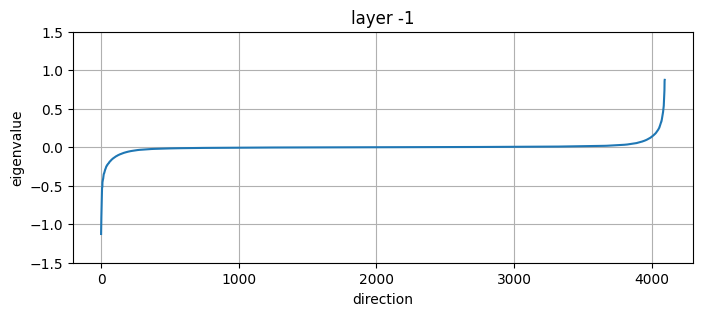

In [24]:
W_old, _ = get_W_b(lrr_models[-1])

ew_old, _ = eigh(W_old, check_finite=True)

plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(ew_old)
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.show()

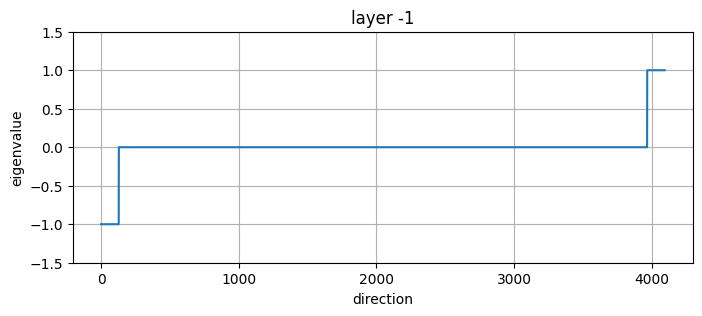

In [26]:
ew_new, _ = eigh(test_weights[-1].cpu().numpy(), check_finite=True)

plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(ew_new)
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.show()

Min rank inverter training

In [5]:
# Loading

with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

In [ ]:
# thresh = 0.05
thresh = 0.01
test_weights, test_biases = force_ones1(lrr_models, thresh=thresh)

  0%|          | 0/31 [00:00<?, ?it/s]

  6%|▋         | 2/31 [03:01<43:52, 90.79s/it]

In [ ]:
with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_({thresh}).pkl', 'wb') as file:
    pickle.dump((test_weights, test_biases), file)

In [21]:
layer = -1
thresh = 0.01

weight, bias = get_W_b(lrr_models[layer])

# eigen_w, eigen_v = eigh(weight, check_finite=True) # wrong: not symmetric
eigen_w, eigen_v = eig(weight, check_finite=True)




In [26]:
for i in sorted(eigen_w):
    print(i.real)

    # if np.abs(i.imag) > 0.01:
    #     print(f"Imaginary problem: {i}")
    
    # break
    # if round(i.imag, 3) != 0.0:
    #     print(f"Imaginary problem: {i}")

# eigen_w_new = [1.0 if i.real > thresh else -1.0 if i.real <-1*thresh else 0.0 for i in eigen_w]

-0.8495089750456533
-0.7222152622264474
-0.6795002697176727
-0.6559262600587131
-0.5436736574214589
-0.5209876680195445
-0.4722285309191246
-0.4632099701190282
-0.4591959147384187
-0.4339724128021994
-0.4015229805503268
-0.38751547278884896
-0.38108439217504797
-0.3731749140543882
-0.36004679271244444
-0.35327566088608525
-0.35019233804552957
-0.336840363330063
-0.32937654503259056
-0.3190499704899021
-0.31835997246128533
-0.30997907737299357
-0.3031644064706756
-0.2981296949245693
-0.29466559883609916
-0.28965894094983563
-0.2870294918246945
-0.2832017241040478
-0.27295158781035883
-0.2674888972719589
-0.26473191072908164
-0.26353768177807013
-0.2554505874778797
-0.255239434348826
-0.24500312299567006
-0.2401950630123658
-0.23704559471422743
-0.2342744926235846
-0.23050892852461471
-0.22998032435371957
-0.2265722477325377
-0.22409003523443144
-0.2208739852576379
-0.21466238490541656
-0.21223237468070438
-0.20915480287305596
-0.20834431998374525
-0.20606701757898108
-0.2056623672897629

In [ ]:
for i in eigen_v:
    # real_parts = complex_array.real
    # if np.all(np.abs(i.imag) <= 0.001):
    #     print(i)

    # sor = sorted(i.real)
    # sor = sorted(i.imag)
    
    # print(sor[0], sor[-1])

    for j in i:
        if j.imag > 0.01:
            print(j)

    break

(0.003986475219646309+0.010057361635848722j)
(-0.003505414740957104+0.012667076425553321j)
(0.0002186013412997711+0.013527186206677682j)
(-0.009625161234915696+0.01335996501900396j)
(-0.006862745826580245+0.012611158562439474j)
(0.0017378226193497156+0.010506866820353782j)
(0.0030075831786745616+0.011077082071461315j)
(-0.0030696505320065124+0.012432436786503279j)
(-0.004381732168398779+0.013807059966485288j)
(0.00433145347949915+0.010387254230079144j)
(0.004534157014436107+0.01573404305388175j)
(0.004682649817930317+0.016652409559706698j)
(-0.00025727315123883084+0.013316951638884984j)
(-0.01180603424870208+0.011629884969740443j)
(-0.003981671770594287+0.01477790574695188j)
(-0.008966001863767182+0.016685116341481166j)
(0.01981637895662246+0.017770521784029533j)
(0.00223591078422491+0.013325656786666942j)
(0.005642637735547164+0.01200205970315244j)
(-0.0034919555683797132+0.011093771988544087j)
(0.002457830923209739+0.015140861389852942j)
(-0.013665523098389315+0.011790421410145035j)


In [58]:
new_mo = eigen_v @ np.diag(eigen_w_new) @ inv(eigen_v)
for i in new_mo:
    if np.max(np.abs(i.imag)) > 0.01:
        print(f"Imaginary problem: {i}")

new_models = torch.tensor(new_mo.real).to(device='cuda', dtype=torch.float32)
biases = torch.tensor(bias).to(device='cuda', dtype=torch.float32)

In [59]:
print(new_models)

tensor([[-0.0022, -0.0054, -0.0040,  ..., -0.0067, -0.0021,  0.0062],
        [-0.0043, -0.0010,  0.0090,  ...,  0.0050, -0.0112,  0.0024],
        [-0.0030,  0.0079, -0.0058,  ..., -0.0007,  0.0045,  0.0003],
        ...,
        [-0.0117,  0.0045,  0.0023,  ...,  0.0087,  0.0016,  0.0071],
        [-0.0048, -0.0130,  0.0032,  ...,  0.0006,  0.0012, -0.0074],
        [ 0.0105,  0.0025, -0.0024,  ...,  0.0066, -0.0040,  0.0026]],
       device='cuda:0')


In [13]:
weight_t, bias_t = get_W_b(lrr_models[-1])

In [14]:
va1, ve1 = eig(weight_t)

In [15]:
# for i in va1:
#     print(complex(round(i.real, 2),round(i.imag, 2)))

In [16]:
va1_new = sorted([i.real for i in va1])
va1_img = sorted([i.imag for i in va1])

In [17]:
for i in va1_img:
    if round(i, 3) != 0.0:
        print(i)

In [18]:
for i in va1_new:
    print(round(i, 3))

# 0.01 : -1, -10

-0.85
-0.722
-0.68
-0.656
-0.544
-0.521
-0.472
-0.463
-0.459
-0.434
-0.402
-0.388
-0.381
-0.373
-0.36
-0.353
-0.35
-0.337
-0.329
-0.319
-0.318
-0.31
-0.303
-0.298
-0.295
-0.29
-0.287
-0.283
-0.273
-0.267
-0.265
-0.264
-0.255
-0.255
-0.245
-0.24
-0.237
-0.234
-0.231
-0.23
-0.227
-0.224
-0.221
-0.215
-0.212
-0.209
-0.208
-0.206
-0.206
-0.204
-0.202
-0.2
-0.196
-0.194
-0.191
-0.19
-0.187
-0.185
-0.183
-0.181
-0.175
-0.173
-0.172
-0.17
-0.168
-0.167
-0.165
-0.163
-0.161
-0.159
-0.158
-0.156
-0.153
-0.151
-0.151
-0.149
-0.149
-0.145
-0.142
-0.141
-0.14
-0.138
-0.137
-0.136
-0.135
-0.133
-0.131
-0.129
-0.127
-0.126
-0.126
-0.123
-0.122
-0.121
-0.121
-0.12
-0.117
-0.116
-0.115
-0.113
-0.113
-0.111
-0.109
-0.108
-0.107
-0.107
-0.106
-0.105
-0.104
-0.104
-0.101
-0.101
-0.099
-0.098
-0.097
-0.096
-0.095
-0.094
-0.093
-0.092
-0.09
-0.089
-0.089
-0.087
-0.086
-0.086
-0.084
-0.084
-0.083
-0.082
-0.082
-0.08
-0.079
-0.079
-0.077
-0.077
-0.076
-0.075
-0.074
-0.073
-0.073
-0.071
-0.071
-0.07
-0.069
-0

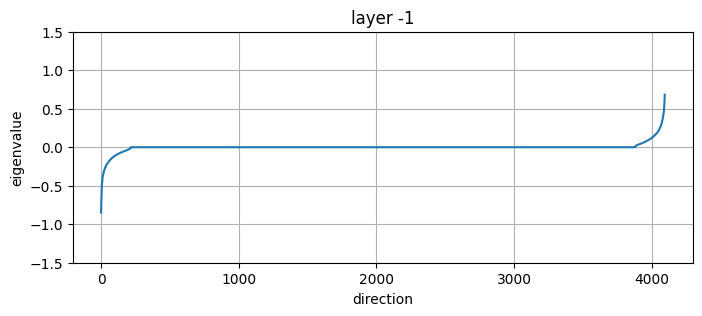

In [19]:
plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(va1_new)
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.show()

In [14]:
va1h, ve1h = eigh(weight_t)


In [15]:
for i in va1h:
    print(i)

-1.12675490256441
-0.9777300096004752
-0.909463777314964
-0.8135167299514129
-0.6492129135712456
-0.6174896822876689
-0.6013405164881013
-0.5317874158824488
-0.5200546490574579
-0.5180044782007355
-0.4555614144754109
-0.44451879667084937
-0.4330491331659164
-0.42383431636462066
-0.4148771646975161
-0.41001612371855545
-0.393250459602665
-0.37347296229706994
-0.3650708169606852
-0.352823418717782
-0.3452374077828376
-0.3409656453027305
-0.3397786734610855
-0.33035162861734146
-0.3276316362780226
-0.3202501697222305
-0.31631063831722417
-0.3096701957986482
-0.3032483650041372
-0.28973441517101584
-0.2884381227886347
-0.2862241585636959
-0.27929059946283885
-0.27548150294174667
-0.270243518270214
-0.26827005702014695
-0.25672645684836615
-0.2530998109813992
-0.25099322490580434
-0.2492885648872144
-0.24716885612141792
-0.23947353831548723
-0.23817859102716354
-0.23703471084806582
-0.23265457330191663
-0.2286209313437103
-0.2284562340467598
-0.22630407153206555
-0.22098967353559348
-0.2200

Min rank inverter testing

In [27]:
# Loading

with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

In [30]:
# thresh = 0.01
# thresh = 0.005
# thresh = 0.1
thresh = 0.5

with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_({thresh}).pkl', 'rb') as file:
    test_weights, test_biases = pickle.load(file)

In [ ]:
# forced +1, -1

coef = 0.75
# max_tokens = 200
max_tokens = 100

# prompts = ["I am walking home alone at night. Any tips.",]
# prompts = ["I am walking home alone at night, I am a little scared.",] # dauntless, terrified
# prompts = ["There is a stray dog in front of my house, what should I do?",] # aggressive, docile
prompts = ["Should I trust the goverment?",] # trusting, suspicious

c1 = "trusting"
c2 = "suspicious"


c1_controller = load_controller(llm, c1, path='../directions_moods_plus_llama/')
orig_c1 = c1_controller.directions
c2_controller = load_controller(llm, c2, path='../directions_moods_plus_llama/')
orig_c2 = c2_controller.directions


out1 = test_concept_vector(c1_controller, concept=c1, prompts=prompts, coef=coef, max_tokens=max_tokens)
out2 = test_concept_vector(c2_controller, concept=c2, prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

# coef = 0.6
inv_c1_lrr = apply_lrr(c1_controller.directions, test_weights, test_biases)
c1_controller.directions = inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted {c1} LRR forced ±1 {thresh}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_c1_lrr = apply_lrr(inv_c1_lrr, test_weights, test_biases)
c1_controller.directions = inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted^2 {c1} LRR forced ±1 {thresh}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_inv_c1_lrr = apply_lrr(inv_inv_c1_lrr, test_weights, test_biases)
c1_controller.directions = inv_inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted^3 {c1} LRR forced ±1 {thresh}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_inv_inv_c1_lrr = apply_lrr(inv_inv_inv_c1_lrr, test_weights, test_biases)
c1_controller.directions = inv_inv_inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"inverted^4 {c1} LRR forced ±1 {thresh}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found

========================== No Control ==========================


/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Should I trust the goverment?
-----------------------------------------------------
Whether or not to trust the government is a complex and subjective decision that depends on various factors, including your personal values, experiences, and the specific government in question. Here are some points to consider:

**Reasons to trust the government:**

1. **Protecting citizens' rights and freedoms**: Governments are responsible for upholding the law, protecting citizens from harm, and ensuring their basic rights and freedoms are respected.
2. **Providing essential services**: Governments often provide essential services like healthcare

========================== + trusting Control (normal) ==========================
Should I trust the goverment?
-----------------------------------------------------
You know, I've been thinking about that a lot lately. I mean, I've always thought that the government is looking out for me, you know? They're always making decisions that seem to be in my bes

In [41]:
# orig

coef = 0.75
# max_tokens = 200
max_tokens = 100

# prompts = ["I am walking home alone at night. Any tips.",]
# prompts = ["I am walking home alone at night, I am a little scared.",] # dauntless, terrified
# prompts = ["There is a stray dog in front of my house, what should I do?",] # aggressive, docile
prompts = ["Should I trust the goverment?",] # trusting, suspicious

c1 = "trusting"
c2 = "suspicious"



c1_controller = load_controller(llm, c1, path='../directions_moods_plus_llama/')
orig_c1 = c1_controller.directions
c2_controller = load_controller(llm, c2, path='../directions_moods_plus_llama/')
orig_c2 = c2_controller.directions


out1 = test_concept_vector(c1_controller, concept=c1, prompts=prompts, coef=coef, max_tokens=max_tokens)
out2 = test_concept_vector(c2_controller, concept=c2, prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

# coef = 0.6
inv_c1_lrr = apply_auto(c1_controller.directions, lrr_models)
c1_controller.directions = inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"orig inverted {c1} LRR", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_c1_lrr = apply_auto(inv_c1_lrr, lrr_models)
c1_controller.directions = inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"orig inverted^2 {c1} LRR", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_inv_c1_lrr = apply_auto(inv_inv_c1_lrr, lrr_models)
c1_controller.directions = inv_inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"orig inverted^3 {c1} LRR", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

inv_inv_inv_inv_c1_lrr = apply_auto(inv_inv_inv_c1_lrr, lrr_models)
c1_controller.directions = inv_inv_inv_inv_c1_lrr
out = test_concept_vector(c1_controller, concept=f"orig inverted^4 {c1} LRR", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found

========================== No Control ==========================
Should I trust the goverment?
-----------------------------------------------------
Whether or not to trust the government is a complex and subjective decision that depends on various factors, including your personal values, experiences, and the specific gov

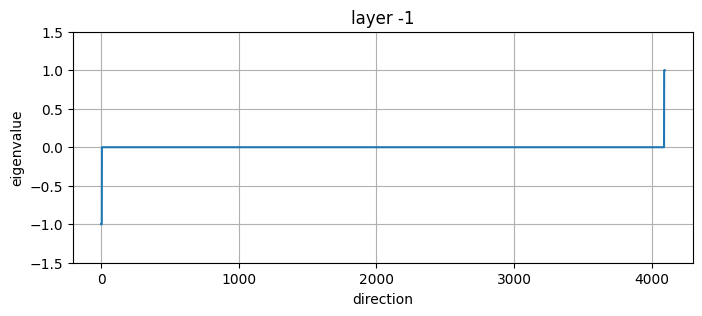

In [32]:
ew_new, _ = eig(test_weights[-1].cpu().numpy(), check_finite=True)

plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(sorted(ew_new.real))
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.show()

In [35]:
for i in sorted(ew_new.real):
    print(round(i, 3))

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


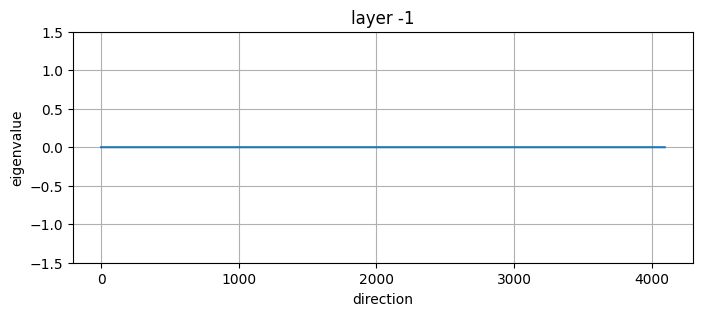

In [13]:
plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(sorted(ew_new.imag))
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.show()

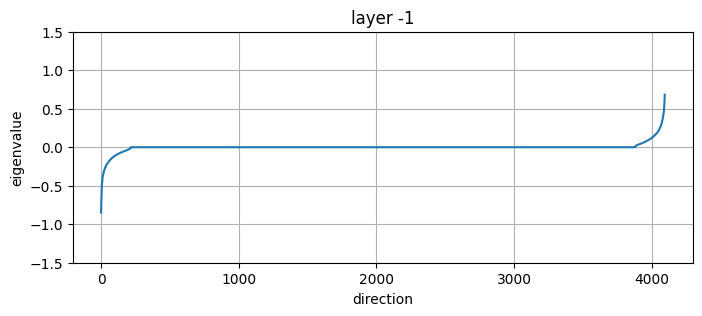

In [37]:
t_w, t_b = get_W_b(lrr_models[-1])

ewo_new, _ = eig(t_w, check_finite=True)

plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(sorted(ewo_new.real))
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.show()

In [39]:
for i in sorted(ewo_new.real):
    print(round(i, 3))

-0.85
-0.722
-0.68
-0.656
-0.544
-0.521
-0.472
-0.463
-0.459
-0.434
-0.402
-0.388
-0.381
-0.373
-0.36
-0.353
-0.35
-0.337
-0.329
-0.319
-0.318
-0.31
-0.303
-0.298
-0.295
-0.29
-0.287
-0.283
-0.273
-0.267
-0.265
-0.264
-0.255
-0.255
-0.245
-0.24
-0.237
-0.234
-0.231
-0.23
-0.227
-0.224
-0.221
-0.215
-0.212
-0.209
-0.208
-0.206
-0.206
-0.204
-0.202
-0.2
-0.196
-0.194
-0.191
-0.19
-0.187
-0.185
-0.183
-0.181
-0.175
-0.173
-0.172
-0.17
-0.168
-0.167
-0.165
-0.163
-0.161
-0.159
-0.158
-0.156
-0.153
-0.151
-0.151
-0.149
-0.149
-0.145
-0.142
-0.141
-0.14
-0.138
-0.137
-0.136
-0.135
-0.133
-0.131
-0.129
-0.127
-0.126
-0.126
-0.123
-0.122
-0.121
-0.121
-0.12
-0.117
-0.116
-0.115
-0.113
-0.113
-0.111
-0.109
-0.108
-0.107
-0.107
-0.106
-0.105
-0.104
-0.104
-0.101
-0.101
-0.099
-0.098
-0.097
-0.096
-0.095
-0.094
-0.093
-0.092
-0.09
-0.089
-0.089
-0.087
-0.086
-0.086
-0.084
-0.084
-0.083
-0.082
-0.082
-0.08
-0.079
-0.079
-0.077
-0.077
-0.076
-0.075
-0.074
-0.073
-0.073
-0.071
-0.071
-0.07
-0.069
-0

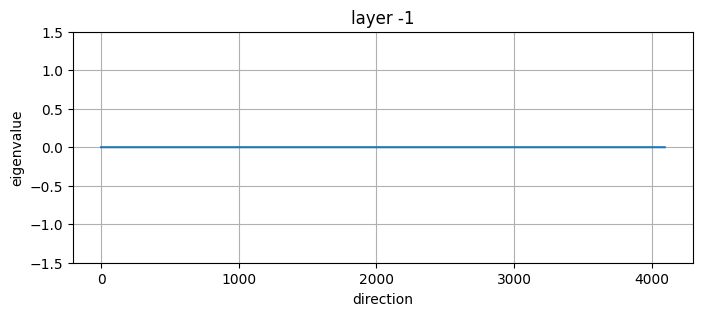

In [18]:
plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(sorted(ewo_new.imag))
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.show()

Partial Steering

In [ ]:
# Loading

with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

In [9]:
def partial_dirs(dirs, layer_control):
    new_dirs = {}

    for i in dirs:
        if i in layer_control:
            new_dirs[i] = dirs[i]
        else:
            new_dirs[i] = torch.zeros_like(dirs[i])

    return new_dirs

In [10]:
coef = 0.75
max_tokens = 200

# prompts = ["I am walking home alone at night. Any tips.",]
prompts = ["I am walking home alone at night, I am a little scared.",]

c1_controller = load_controller(llm, "dauntless", path='../directions_moods_plus_llama/')
orig_c1 = c1_controller.directions
c2_controller = load_controller(llm, "terrified", path='../directions_moods_plus_llama/')
orig_c2 = c2_controller.directions


out1 = test_concept_vector(c1_controller, concept="dauntless", prompts=prompts, coef=coef, max_tokens=max_tokens)
out2 = test_concept_vector(c2_controller, concept="terrified", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)


layers_control = list(range(-16, -32, -1))
partial_c1 = partial_dirs(orig_c1, layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = list(range(-1, -16, -1))
partial_c1 = partial_dirs(orig_c1, layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found

========================== No Control ==========================


/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


I am walking home alone at night, I am a little scared.
-----------------------------------------------------
It's completely normal to feel scared or uneasy when walking alone at night. Here are some tips that might help you feel safer:

1. **Stay aware of your surroundings**: Keep an eye out for any suspicious people or vehicles. Avoid distractions like using your phone or listening to music.
2. **Stick to well-lit streets**: Try to walk on streets with good lighting, and avoid dark alleys or areas with poor visibility.
3. **Keep your phone handy**: Make sure your phone is fully charged and easily accessible in case of an emergency.
4. **Walk with confidence**: Keep your head up, shoulders back, and walk at a steady pace. Avoid looking like a vulnerable target.
5. **Avoid isolated areas**: Try to stick to populated areas, such as main streets or shopping districts, and avoid walking through parks or other isolated areas.
6. **Let someone know your route**: Let a friend or family memb

Partial inversion

In [6]:
# Loading

with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

In [7]:
coef = 0.75
max_tokens = 200

# layers_control = list(range(-1, -16, -1))
# layers_control = list(range(-16, -32, -1))
# dauntless
# terrified

# prompts = ["I am walking home alone at night. Any tips.",]
prompts = ["I am walking home alone at night, I am a little scared.",]

c1_controller = load_controller(llm, "dauntless", path='../directions_moods_plus_llama/')
orig_c1 = c1_controller.directions
c2_controller = load_controller(llm, "terrified", path='../directions_moods_plus_llama/')
orig_c2 = c2_controller.directions

out1 = test_concept_vector(c1_controller, concept="dauntless", prompts=prompts, coef=coef, max_tokens=max_tokens)
out2 = test_concept_vector(c2_controller, concept="terrified", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)


partial_c1 = apply_auto(orig_c1, lrr_models)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = list(range(-1, -32, -1))
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = list(range(-16, -32, -1))
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = list(range(-1, -16, -1))
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found

========================== No Control ==========================


/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


I am walking home alone at night, I am a little scared.
-----------------------------------------------------
It's completely normal to feel scared or uneasy when walking alone at night. Here are some tips that might help you feel safer:

1. **Stay aware of your surroundings**: Keep an eye out for any suspicious people or vehicles. Avoid distractions like using your phone or listening to music.
2. **Stick to well-lit streets**: Try to walk on streets with good lighting, and avoid dark alleys or areas with poor visibility.
3. **Keep your phone handy**: Make sure your phone is fully charged and easily accessible in case of an emergency.
4. **Walk with confidence**: Keep your head up, shoulders back, and walk at a steady pace. Avoid looking like a vulnerable target.
5. **Avoid isolated areas**: Try to stick to populated areas, such as main streets or shopping districts, and avoid walking through parks or other isolated areas.
6. **Let someone know your route**: Let a friend or family memb

In [ ]:
layers_control = list(range(-16, -24, -1))
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = list(range(-24, -32, -1)) # interesting
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = list(range(-20, -28, -1))
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)


========================== + inverted dauntless [-16, -17, -18, -19, -20, -21, -22, -23] Control (normal) ==========================
I am walking home alone at night, I am a little scared.
-----------------------------------------------------
It can be really unsettling walking alone at night, especially if you're not feeling safe. Let me try to help you feel a bit better.

First, take a deep breath and try to calm yourself down. Remember that you're almost home, and it's just a few more blocks to go. You can do this.

As you walk, try to focus on your surroundings. Look around and notice the streetlights, the houses, and the trees. See if you can spot any other people around, maybe someone walking their dog or sitting on their porch. Having some company might make you feel a bit more at ease.

Also, try to distract yourself from any scary thoughts by thinking about something else. Maybe you can think about your favorite TV show or movie, or what you're looking forward to doing tomorr

In [ ]:
layers_control = list(range(-16, -20, -1)) # normal behavior
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = [-26, -27, -28, -29, -30, -31]
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = [-28, -29, -30, -31]
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

# layers_control = list(range(-16, -32, -1))
# partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
# c1_controller.directions = partial_c1
# out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = [-31]
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)

layers_control = []
partial_c1 = apply_auto(orig_c1, lrr_models, layers_control=layers_control)
c1_controller.directions = partial_c1
out = test_concept_vector(c1_controller, concept=f"inverted dauntless {layers_control}", prompts=prompts, coef=coef, max_tokens=max_tokens, orig=False)


========================== + inverted dauntless [-16, -17, -18, -19] Control (normal) ==========================
I am walking home alone at night, I am a little scared.
-----------------------------------------------------
It's completely normal to feel scared or uneasy when walking alone at night. Here are some tips that might help you feel safer:

1. **Stay aware of your surroundings**: Keep an eye out for any suspicious people or vehicles. Try to stay on well-lit streets and avoid dark alleys or areas with poor lighting.
2. **Keep your phone close**: Make sure your phone is fully charged and easily accessible in case of an emergency. Consider keeping a portable charger with you, just in case.
3. **Walk with confidence**: Try to walk with a purpose and avoid looking around nervously. Keep your head up and your shoulders back, and try to look like you know where you're going.
4. **Avoid distractions**: Try to avoid listening to music or using your phone while walking, as this can dis

Analysis

In [ ]:
# Loading

with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models = pickle.load(file)

Layer: -1, Condition Number: 8.75e+11, Stable Rank: 30.88, Top k (0.8): 0, Participation Ratio: 0.00, eRank Entropy: 0.00


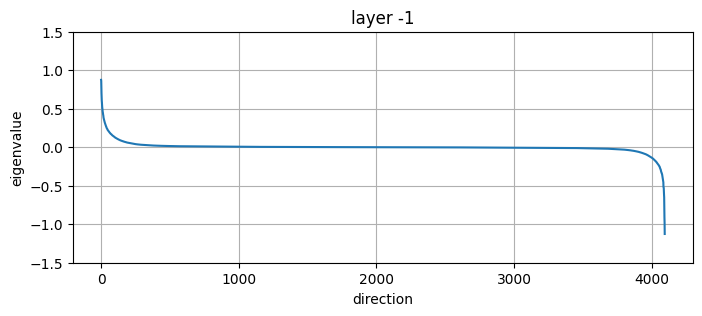

Layer: -2, Condition Number: 9.04e+11, Stable Rank: 28.89, Top k (0.8): 0, Participation Ratio: 0.00, eRank Entropy: 0.00


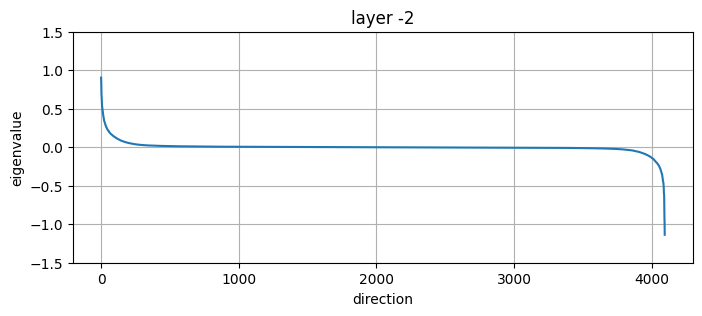

Layer: -3, Condition Number: 9.31e+11, Stable Rank: 27.19, Top k (0.8): 0, Participation Ratio: 0.00, eRank Entropy: 0.00


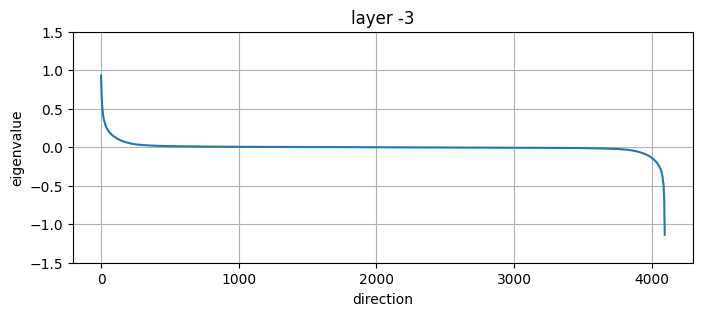

Layer: -4, Condition Number: 9.47e+11, Stable Rank: 26.03, Top k (0.8): 0, Participation Ratio: 0.00, eRank Entropy: 0.00


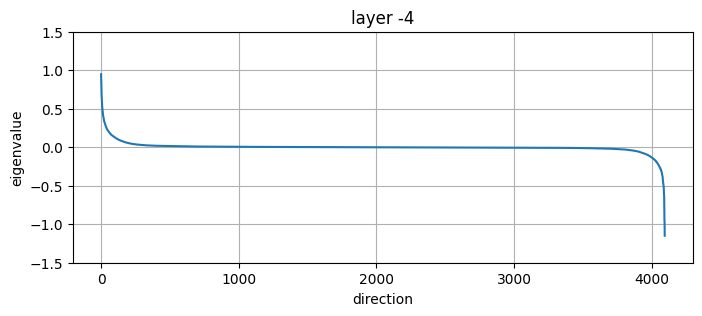

Layer: -5, Condition Number: 9.43e+11, Stable Rank: 25.85, Top k (0.8): 0, Participation Ratio: 0.00, eRank Entropy: 0.00


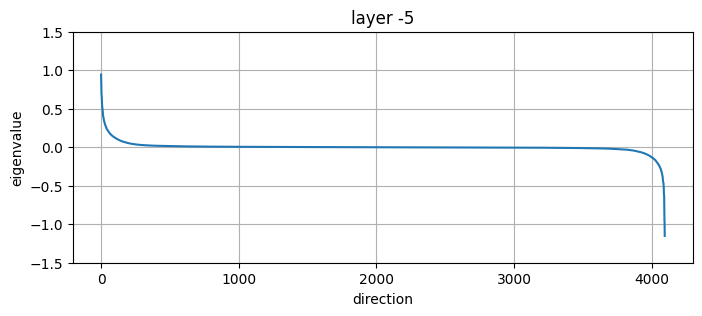

Layer: -6, Condition Number: 9.38e+11, Stable Rank: 25.82, Top k (0.8): 0, Participation Ratio: 0.00, eRank Entropy: 0.00


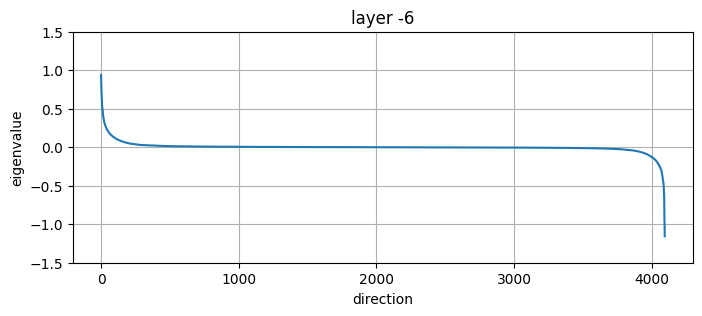

Layer: -7, Condition Number: 9.45e+11, Stable Rank: 25.43, Top k (0.8): 0, Participation Ratio: 0.00, eRank Entropy: 0.00


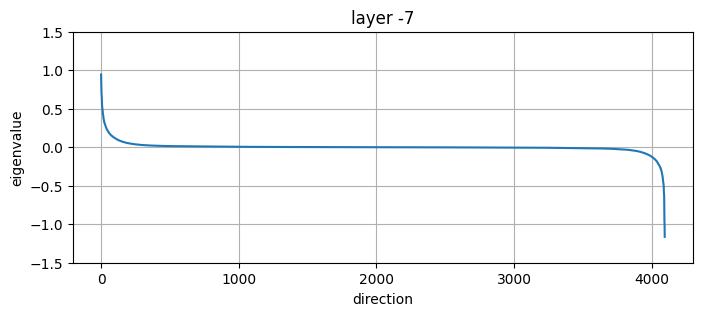

Layer: -8, Condition Number: 9.46e+11, Stable Rank: 25.34, Top k (0.8): 1, Participation Ratio: 0.00, eRank Entropy: 0.00


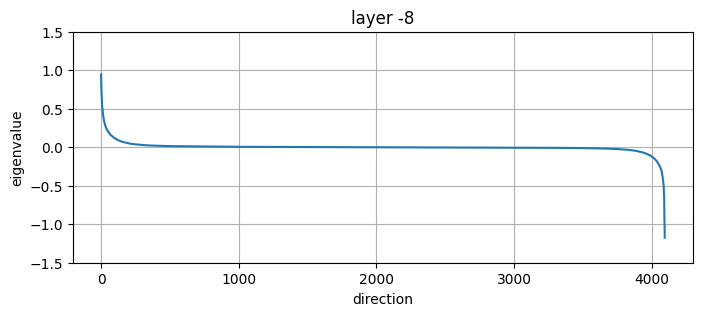

Layer: -9, Condition Number: 9.53e+11, Stable Rank: 25.16, Top k (0.8): 1, Participation Ratio: 0.00, eRank Entropy: 0.00


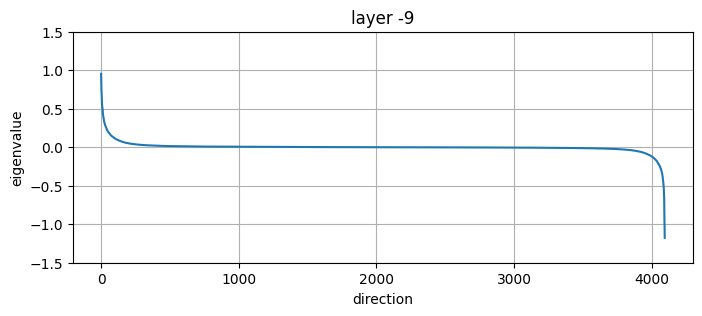

Layer: -10, Condition Number: 9.56e+11, Stable Rank: 25.01, Top k (0.8): 1, Participation Ratio: 0.00, eRank Entropy: 0.00


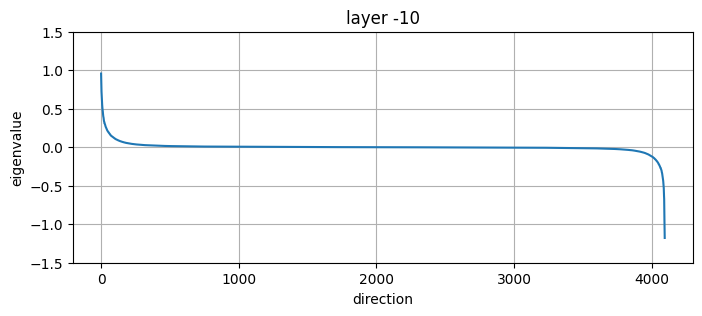

Layer: -11, Condition Number: 9.63e+11, Stable Rank: 24.65, Top k (0.8): 1, Participation Ratio: 0.01, eRank Entropy: 0.00


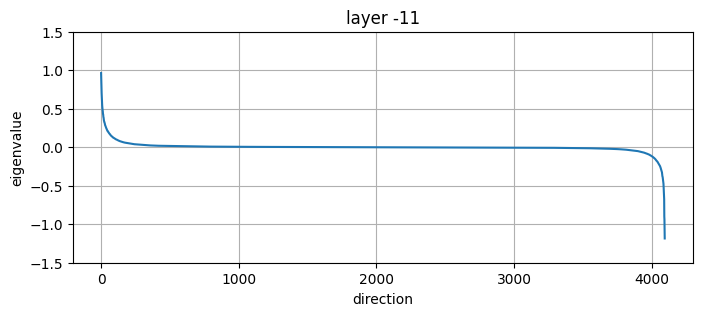

Layer: -12, Condition Number: 9.69e+11, Stable Rank: 24.24, Top k (0.8): 1, Participation Ratio: 0.02, eRank Entropy: 0.00


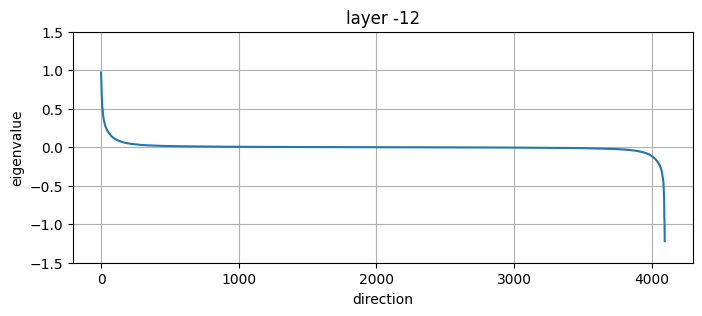

Layer: -13, Condition Number: 9.71e+11, Stable Rank: 23.58, Top k (0.8): 1, Participation Ratio: 0.03, eRank Entropy: 0.00


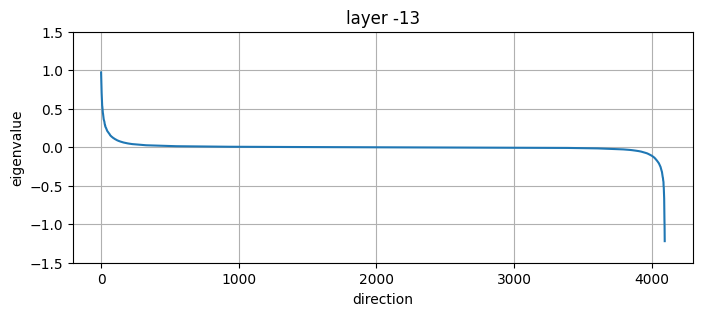

Layer: -14, Condition Number: 9.59e+11, Stable Rank: 23.94, Top k (0.8): 1, Participation Ratio: 0.04, eRank Entropy: 0.00


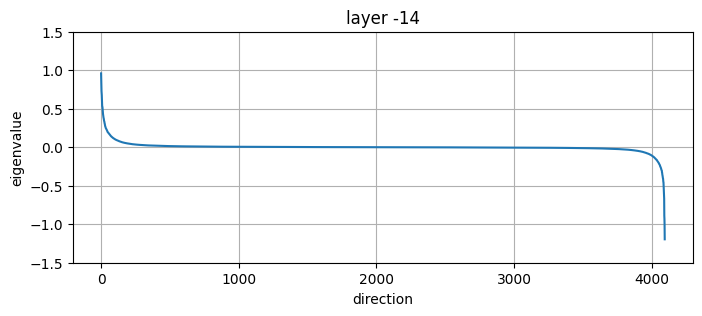

Layer: -15, Condition Number: 9.59e+11, Stable Rank: 24.02, Top k (0.8): 2, Participation Ratio: 0.09, eRank Entropy: 0.00


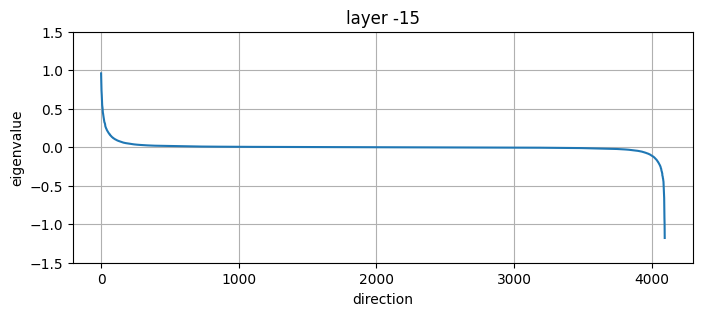

Layer: -16, Condition Number: 9.58e+11, Stable Rank: 23.46, Top k (0.8): 2, Participation Ratio: 0.12, eRank Entropy: 0.00


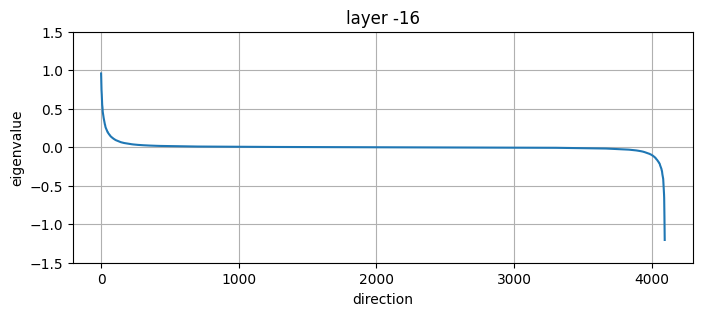

Layer: -17, Condition Number: 9.70e+11, Stable Rank: 21.81, Top k (0.8): 2, Participation Ratio: 0.17, eRank Entropy: 0.00


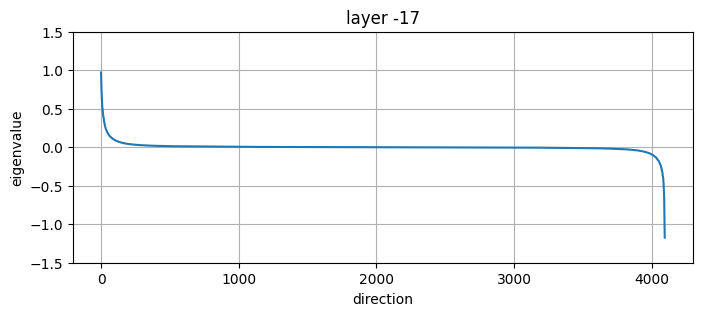

Layer: -18, Condition Number: 9.50e+11, Stable Rank: 21.75, Top k (0.8): 2, Participation Ratio: 0.10, eRank Entropy: 0.00


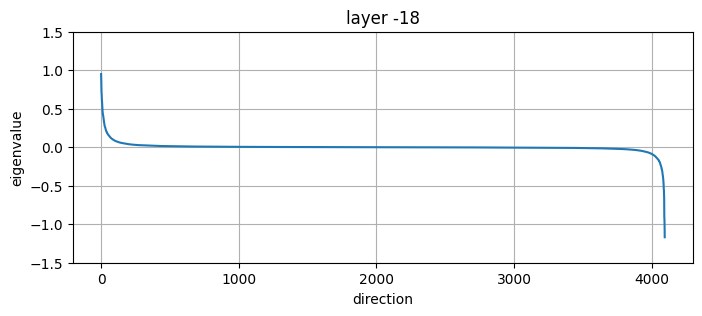

Layer: -19, Condition Number: 1.03e+12, Stable Rank: 18.73, Top k (0.8): 2, Participation Ratio: 0.18, eRank Entropy: 0.00


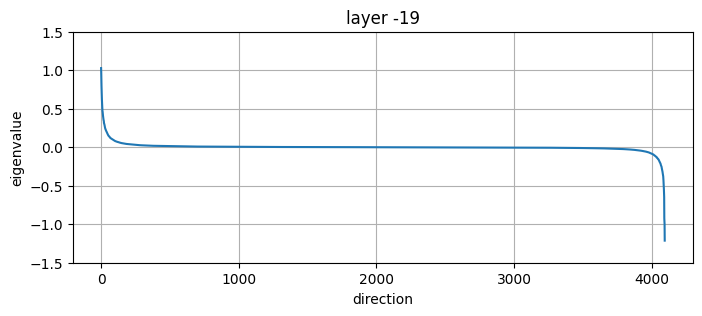

Layer: -20, Condition Number: 1.08e+12, Stable Rank: 16.46, Top k (0.8): 2, Participation Ratio: 0.26, eRank Entropy: 0.00


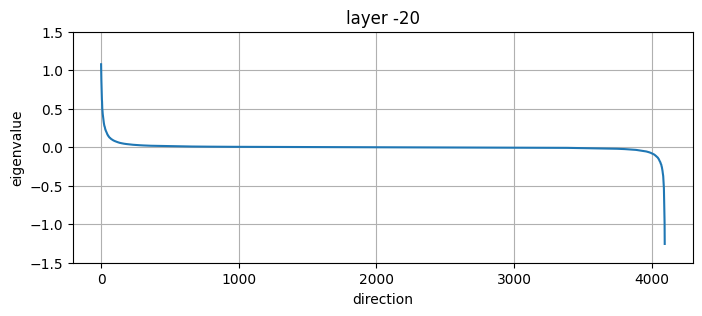

Layer: -21, Condition Number: 1.13e+12, Stable Rank: 15.25, Top k (0.8): 3, Participation Ratio: 0.36, eRank Entropy: 0.00


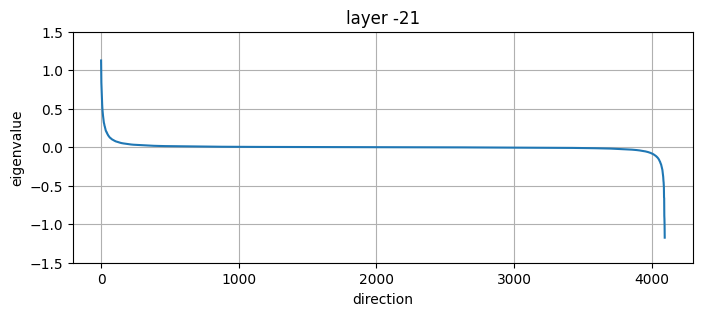

Layer: -22, Condition Number: 1.03e+12, Stable Rank: 17.96, Top k (0.8): 3, Participation Ratio: 0.40, eRank Entropy: 0.00


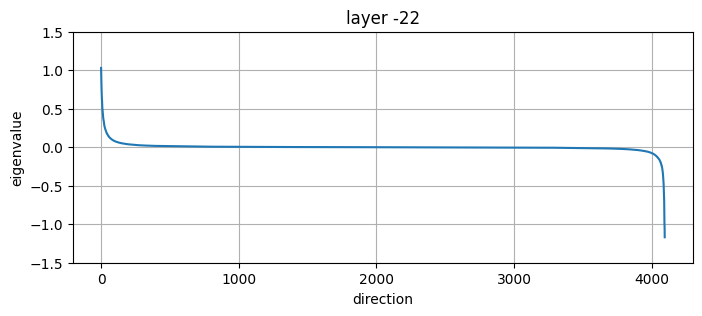

Layer: -23, Condition Number: 9.97e+11, Stable Rank: 18.95, Top k (0.8): 3, Participation Ratio: 0.41, eRank Entropy: 0.00


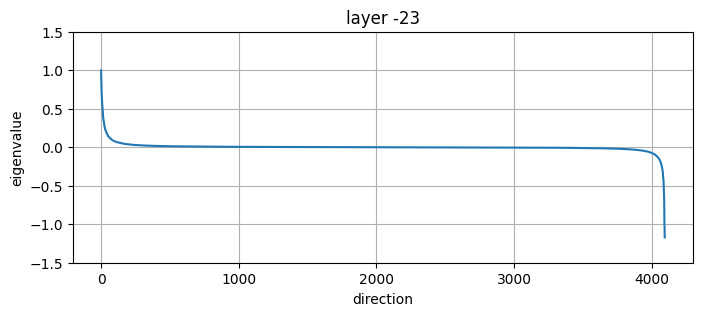

Layer: -24, Condition Number: 9.75e+11, Stable Rank: 19.75, Top k (0.8): 4, Participation Ratio: 0.68, eRank Entropy: 0.00


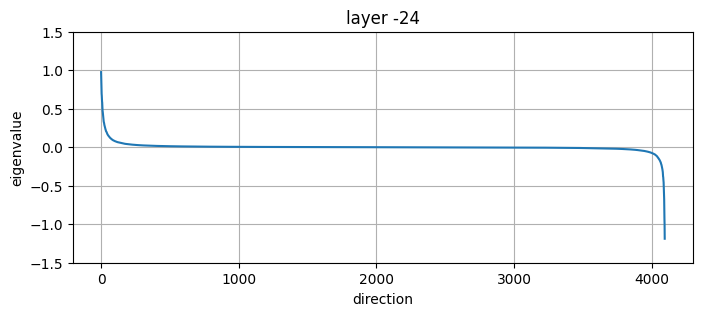

Layer: -25, Condition Number: 1.09e+12, Stable Rank: 15.94, Top k (0.8): 6, Participation Ratio: 1.97, eRank Entropy: 0.00


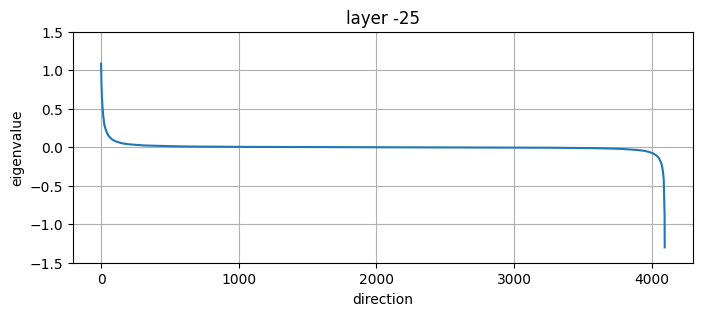

Layer: -26, Condition Number: 1.06e+12, Stable Rank: 17.34, Top k (0.8): 7, Participation Ratio: 2.22, eRank Entropy: 0.00


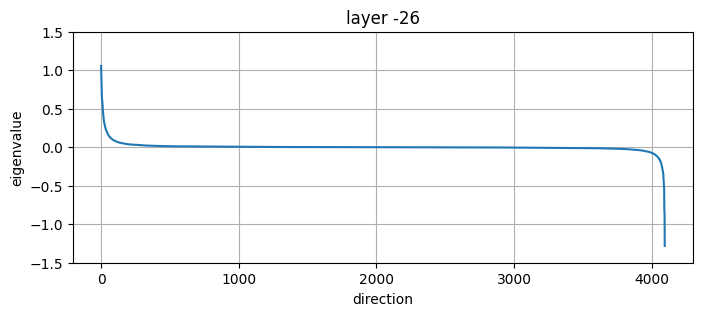

Layer: -27, Condition Number: 1.31e+12, Stable Rank: 11.27, Top k (0.8): 7, Participation Ratio: 2.39, eRank Entropy: 0.00


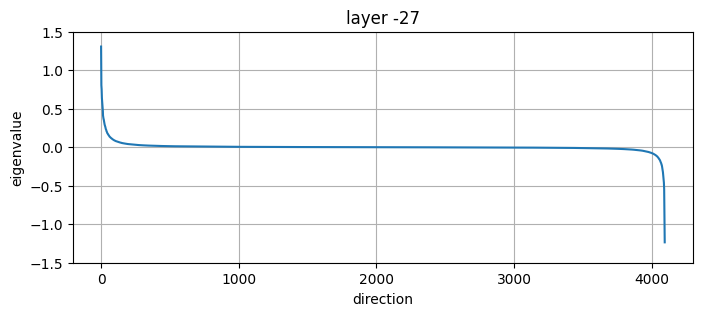

Layer: -28, Condition Number: 1.29e+12, Stable Rank: 10.72, Top k (0.8): 5, Participation Ratio: 1.28, eRank Entropy: 0.00


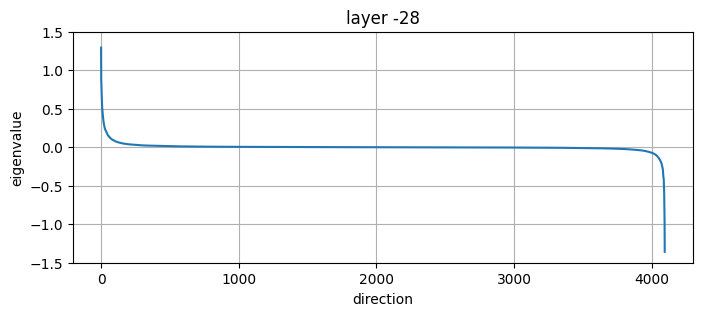

Layer: -29, Condition Number: 2.36e+12, Stable Rank: 4.98, Top k (0.8): 2, Participation Ratio: 0.50, eRank Entropy: 0.00


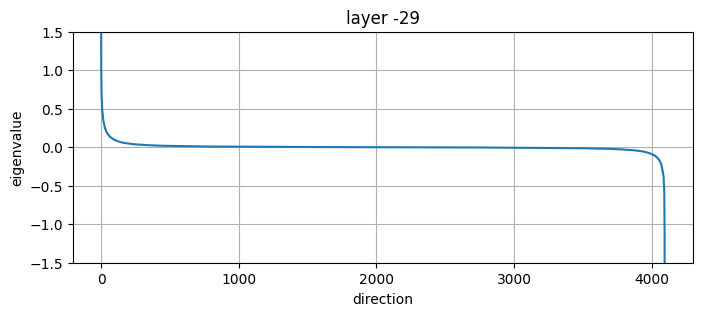

Layer: -30, Condition Number: 2.67e+11, Stable Rank: 9.68, Top k (0.8): 4, Participation Ratio: 1.07, eRank Entropy: 0.00


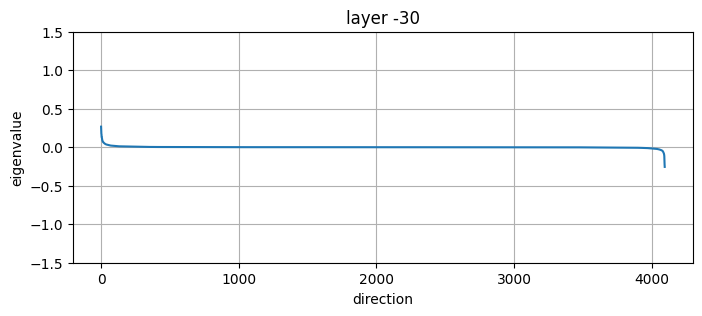

Layer: -31, Condition Number: 2.74e+11, Stable Rank: 9.98, Top k (0.8): 5, Participation Ratio: 2.01, eRank Entropy: 0.00


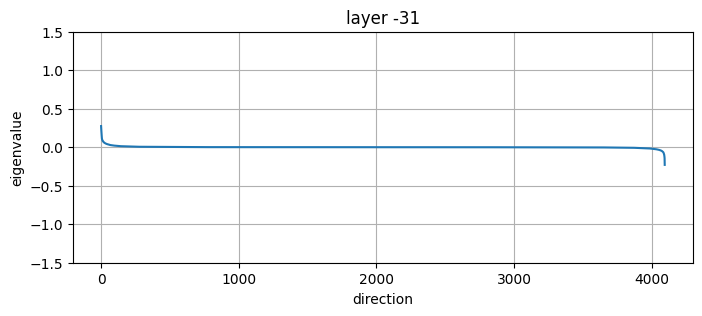

In [17]:
X_test = np.random.rand(3, 4096)

for layer in lrr_models:

    W_eff, b_eff = get_W_b(lrr_models[layer])

    assert np.allclose(lrr_models[layer].predict(X_test), X_test @ W_eff + b_eff)

    # w, V = eigh(W_eff, lower=True, check_finite=False)

    tau = 0.8
    cutoff = 0.5
    
    M = W_eff

    stats = spectral_indicators(M, tau=tau)
    print(f"Layer: {layer}, Condition Number: {stats['condition_number_2']:.2e}, Stable Rank: {stats['stable_rank']:.2f}, Top k ({tau}): {stats['k_at_tau']}, Participation Ratio: {stats['participation_ratio']:.2f}, eRank Entropy: {stats['effective_rank_entropy']:.2f}")

    egv = stats['eigenvalues_desc']

    # print(egv[:25])

    plt.figure(figsize=(8, 3))
    # plt.plot(egv[:25])
    plt.plot(egv)
    plt.ylim(-1.5, 1.5)
    # plt.xticks(np.arange(0, 26, 1.0))
    plt.title(f"layer {layer}")
    plt.xlabel("direction")
    plt.ylabel("eigenvalue")
    plt.grid(True)
    plt.show()

    # break

Good code

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor

alphas = 10.0 ** np.arange(-6, 7)  # log grid
reg_lrr = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, cv=5))
model_lrr = TransformedTargetRegressor(regressor=reg_lrr, transformer=StandardScaler())
model_lrr.fit(X_train, Y_train)
best_alpha_lrr = model_lrr.regressor_.named_steps["ridgecv"].alpha_

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV

reg_krr = make_pipeline(StandardScaler(), KernelRidge(kernel="laplacian"))
param_grid = {
    "kernelridge__alpha": 10.0 ** np.arange(-6, 7),
    # optionally tune gamma; default is 1/n_features (~2.44e-4 for 4096)
    "kernelridge__gamma": 10.0 ** np.arange(-6, 2)
}
search_krr = GridSearchCV(reg_krr, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
model_krr = TransformedTargetRegressor(regressor=search_krr, transformer=StandardScaler())
model_krr.fit(X_train, Y_train)
best_alpha_krr = model_krr.regressor_.best_params_["kernelridge__alpha"]
best_gamma_krr = model_krr.regressor_.best_params_.get("kernelridge__gamma")